#### 5 main steps of machine learning algorithm:
1. Selection of features.
2. Choosing a performance metric.
3. Choosing a classifier and optimization algorithm
4. Evaluating the performance of the model.
5. Tuning the algorithm

In [1]:
%matplotlib inline

In [2]:
# Using scikit-learn
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]] # petal length and petal width
y = iris.target

In [3]:
# Split into separate training and test datasets
from sklearn.cross_validation import train_test_split

# randomly split x and y into 30 percent test data and 70 percent training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/shunji/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# use same scaling parameters to standardize training and test set
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
# Train a perceptron model
# One-vs.-Rest(OvR) method allows classification of more than 2 classes
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.01, random_state=0) # eta0 = learning rate
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [6]:
# Predict using model
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [7]:
# Other metrics, eg. classification accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.911111


In [8]:
# plot decision regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y==cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:, 1], c='',
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label='test set')
    

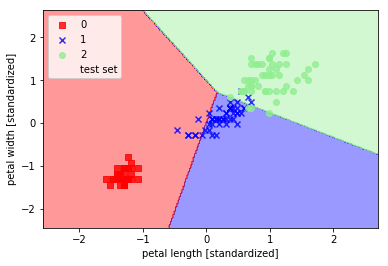

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

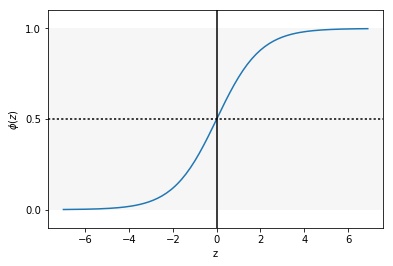

In [10]:
# logistic regression

# plot and visualize sigmoid function for some values in range -7 to 7
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k') # vertical line at 0.0
plt.axhspan(0.0, 1.0, facecolor='10', alpha=1.0, ls='dotted') # shade box from y=0 to y=1
plt.axhline(y=0.5, ls='dotted', color='k') # horizontal dashed line at y=0.5
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

# Sigmoid function takes real number values as input and transforms them to values in the range [0,1],
# with intercept at phi(z) = 0.5

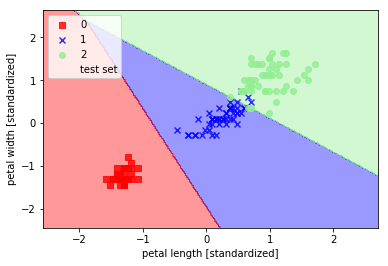

In [11]:
# Training a logistic regression model with scikit-learn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [12]:
# predict class-membership probability of samples
lr.predict_proba([X_test_std[0, :]]) # first sample

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

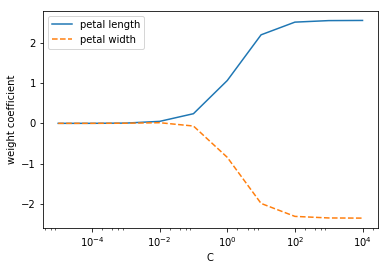

In [13]:
# Tackling overfitting via regularization
# C = 1/lambda, where lambda is the regularization parameter
# By decreasing C we increase regularization strength
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
        label='petal length')
plt.plot(params, weights[:, 1], linestyle = '--',
        label = 'petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

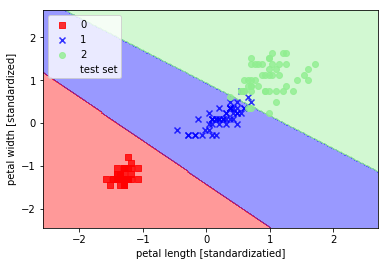

In [14]:
# Maximum margin classification with support vector machines
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined, classifier=svm,
                     test_idx=range(105, 150))
plt.xlabel('petal length [standardizatied]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [15]:
# Alternative implementations in scikit-learn
# Stochastic Gradient Descent
# Also supports online learning
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

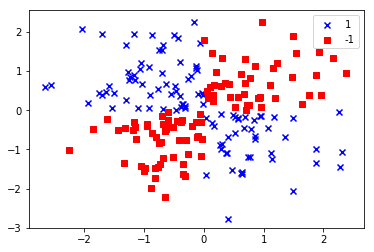

In [16]:
# Solving nonlinear problems using a kernel SVM
# to solve nonlinear classification problems

# create a sample dataset for nonlinear classification problem
# cannot separate samples from positive and negative class using linear hyperplane
np.random.seed(0)
X_xor = np.random.randn(200, 2) # 200 rows of 2 columns, normal dist mean 0 variance 1
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0) # if both > 0 or both <= false.
y_xor = np.where(y_xor, 1, -1) # convert true into 1, -1
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

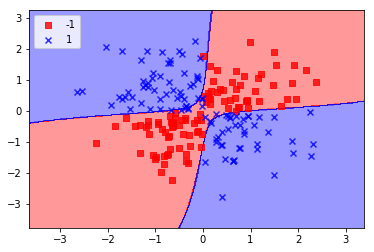

In [17]:
# Using the kernel trick to find separating hyperplanes in higher dimensional space
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0) # Radial Basis Function kernel
# gamma is cut off parameter, higher gamma softer decision boundary
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()


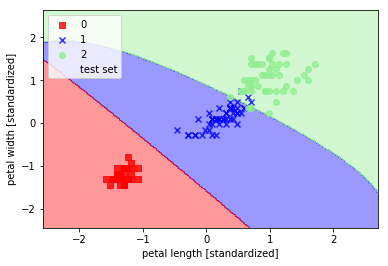

In [18]:
# Comparing gamma, applying RBF kernel SVM to Iris flower dataset
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined, classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

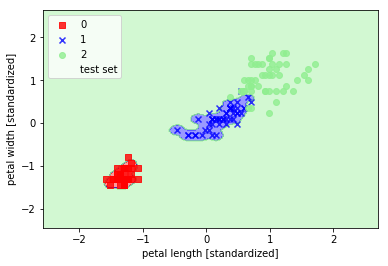

In [19]:
# Increase gamma, might lead to overfitting and high generalization error
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined, classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

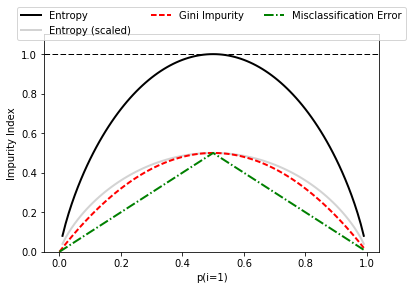

In [28]:
# Decision Trees

# Using decision algorithm, start at tree root and split data on the feature that results in the largest
# Information Gain (IG). In iterative process, repeat splitting procedure until leaves are pure.
# To prevent overfitting, prune the tree by setting limit for maximal depth of tree.
# Different Objective functions, entropy, gini impurity and classification error

# visualize impurity criteria

import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent] # scaled entropy by 0.5
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip ([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)',
                          'Gini Impurity',
                           'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
         ncol=3, fancybox=True, shadow=False)
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

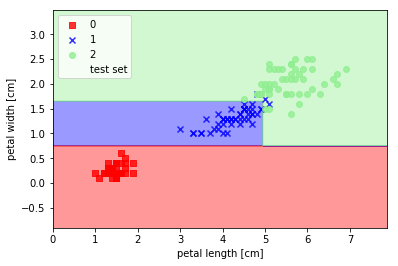

In [31]:
# Building a decision tree

# The deeper the decision tree, the more complex the decision boundary and can result in overfitting
# Feature scaling is not a requirement for decision tree algorithms

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                             max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                     classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [34]:
# Export decisinon tree for visualizing

from sklearn.tree import export_graphviz
export_graphviz(tree,
               out_file='tree.dot',
               feature_names=['petal length', 'petal width'])
# view in command line:
# > dot -Tpng tree.dot -o tree.png

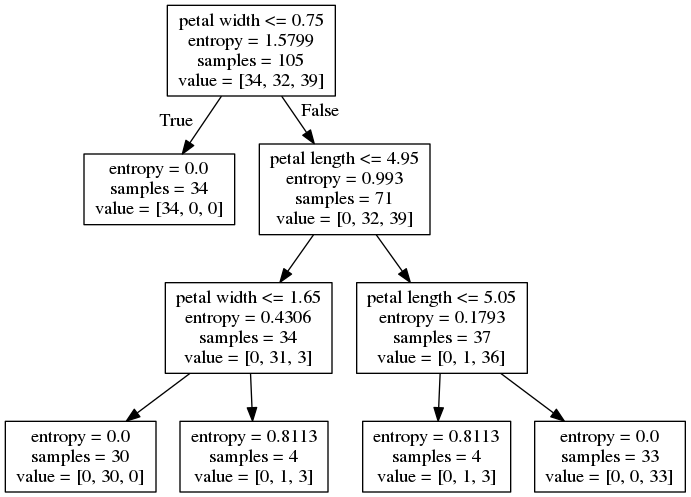

In [35]:
from IPython.display import Image
Image("./tree.png")

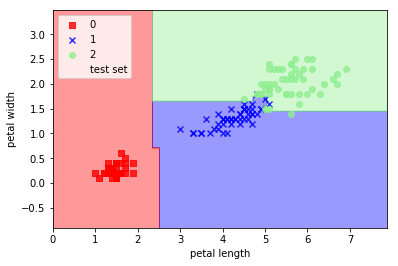

In [37]:
# Combining weak to strong learners via random forests

# ensemble of decision trees - combine weak learners to build a robust strong learner that has
# better generalization error and is less susceptible to overfitting

# 1. Draw random bootstrap sample of size n (randomly choose n samples from the training set with replacement)
# 2. Grow a decision tree from the bootstrap sample. At each node:
#     1. Randomly select d features without replacement.
#     2. Split the node using the feature that provides the best split according to the objective function.
# 3. Repeat steps 1-2 k times.
# 4. Aggregate the prediction by each tree to assign the class label by majority vote.

# Not as easy to interpret as decision trees.
# No need to worry so much about choosing good hyperparameter values - robust to noise from individual trees.
# Tune the number of trees, k, the bigger, the better the performance at the expense of increased computational
# cost.
# Size n of bootstrap can be tuned to control bias-variance tradeoff. Larger n, decrease randomness and increase 
# variance - overfitting. Lower n, high bias and underfitting. Usually n = size of training set.
# Number of features d at each split can be tuned. Smaller than features in training set, d=sqrt(m) usually,
# m is the number of features in training set.

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=10, # 10 decision trees
                               random_state=1,
                               n_jobs=2) # parallelize over 2 cores
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                     classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

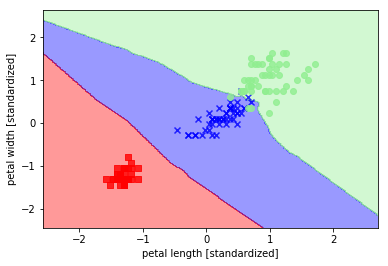

In [39]:
# K-nearest neighbors - a lazy learning algorithm

# Lazy because it does not learn a discriminative function from the training data
# but memorizes the training dataset instead.

# Parametric vs Nonparametric models
# Parametric - estimate parameters from training dataset to learn function for classification,
# does not requre training set after learning
# Nonparametric - cannot be characterized by fixed set of parameters, parameters grow with training data.

# KNN algorithm
# 1. Choose the number of k and a distance metric
# 2. Find the k nearest neighbors of the sample that we want to classify.
# 3. Assign the class label by majority vote.

# Classifier can adapt immediately to new data.
# Computational complexity grows linearly with the number of samples in the training dataset.
# Cannot discard training samples.
# Susceptible to curse of dimensionality - feature space becomes increasingly sparse for increasing number of dimensions,
# neighbors not as useful for classification.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
# minkowski, generalization of euclidean/manhattan distance
# p = 1 for manhattan, p = 2 for euclidean
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                     classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()